In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('top_english_movies.csv')

In [3]:
df = pd.DataFrame(data)

Extract numerical features for clustering

In [4]:
numerical_features = ['movie_rating']
multipliers = {'K': 10**3, 'M': 10**6, 'B': 10**9}

def convert_votes(votes):
    if pd.isnull(votes):
        return 0
    for suffix, multiplier in multipliers.items():
        if suffix in votes:
            return float(votes.replace(suffix, '')) * multiplier
    return float(votes)

df['user_votes'] = df['user_votes'].apply(convert_votes)

Standardize the features


In [5]:
scaler = StandardScaler()
df[numerical_features + ['user_votes']] = scaler.fit_transform(df[numerical_features + ['user_votes']])

Combine the features

In [6]:
X = df[numerical_features + ['user_votes']].values

Get user input for the value of k

In [7]:
k_value = int(input("Enter the value of k for K-Means clustering: "))

Enter the value of k for K-Means clustering: 3


Apply K-Means clustering

In [8]:
kmeans = KMeans(n_clusters=k_value, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

In [9]:
print(df[['movie_name', 'cluster']])

                                           movie_name  cluster
0                            The Shawshank Redemption        0
1                                       The Godfather        0
2                                     The Dark Knight        0
3                               The Godfather Part II        2
4                                        12 Angry Men        2
5                                    Schindler's List        2
6       The Lord of the Rings: The Return of the King        1
7                                        Pulp Fiction        1
8   The Lord of the Rings: The Fellowship of the Ring        1
9                                        Forrest Gump        1
10                                         Fight Club        1
11              The Lord of the Rings: The Two Towers        1
12                                          Inception        1
13     Star Wars: Episode V - The Empire Strikes Back        2
14                                         The Matrix  

Plot the clusters

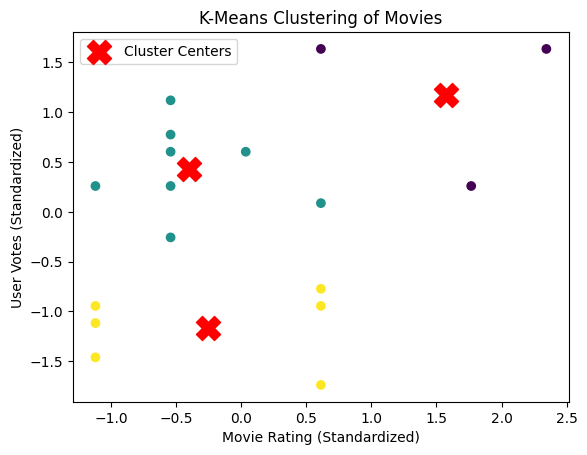

In [10]:
plt.scatter(df['movie_rating'], df['user_votes'], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.title('K-Means Clustering of Movies')
plt.xlabel('Movie Rating (Standardized)')
plt.ylabel('User Votes (Standardized)')
plt.legend()
plt.show()